# Marvin Maps
Marvin Maps is how you deal with the DAP MAPS FITS files easily.  You can retrieve maps in several ways.  Let's take a took. 

# From a Marvin Maps
Marvin Maps takes the same inputs as cube: filename, plateifu, or mangaid.  It also accepts keywords **bintype** and **template_kin**.  These uniquely define a DAP MAPS file.  By default, Marvin will load a MAPS file of **bintype=SPX** and **template_kin=GAU-MILESHC** for MPL-5.  For MPL-4, the defaults are **bintype=NONE**, and **template_kin=MIUSCAT-THIN**.

In [18]:
# import the maps
from marvin.tools.maps import Maps

# Load a MPL-5 map
mapfile = '/Users/Brian/Work/Manga/analysis/v2_0_1/2.0.2/SPX-GAU-MILESHC/8485/1901/manga-8485-1901-MAPS-SPX-GAU-MILESHC.fits.gz'
# Let's get a default map of

maps = Maps(filename=mapfile)
print(maps)

<Marvin Maps (plateifu='8485-1901', mode='local', data_origin='file')>


Once you have a maps object, you can access the raw maps file and header and extensions via **maps.header** and **maps.data**.  Alternatively, you can access individual maps using the **getMap** method.  **getMap** works by specifying a parameter and a channel.  The parameter and channels names are equivalent to those found in the MAPS FITS extensions and headers, albeit lowercased. 

In [48]:
# Let's grab the H-alpha flux emission line map
haflux = maps.getMap('emline_gflux', channel='ha_6564')
print(haflux)

<Marvin Map (plateifu='8485-1901', property='emline_gflux', channel='ha_6564')>


We can easily plot the map using the internal plot function.  Currently maps are plotted using some default Matplotlib color schemes and scaling.  

<IPython.core.display.Javascript object>


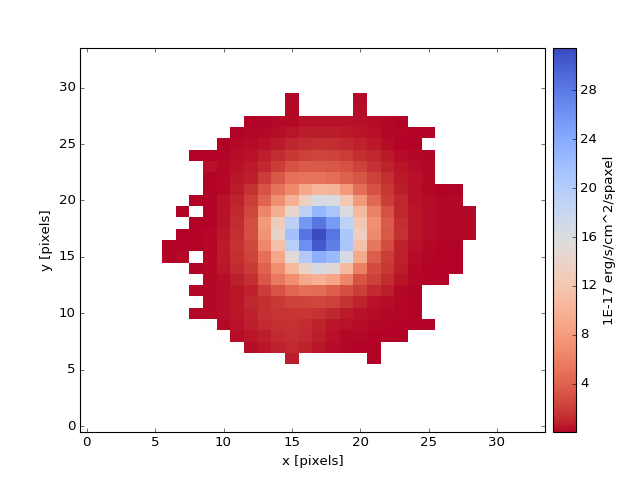

In [49]:
# turn on interactive plotting
%matplotlib notebook

# let's plot it
haflux.plot()

**Try Yourself** Now try grabbing and plotting the map for stellar velocity in the cell below.

You can access the individual values, ivar, and mask for your map via the **.value**, **.ivar**, and **.mask** attributes.  These are 2d-array numpy arrays.

In [50]:
haflux.value, haflux.mask

(array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]]),
 array([[1073741843, 1073741843, 1073741843, ..., 1073741843, 1073741843,
         1073741843],
        [1073741843, 1073741843, 1073741843, ..., 1073741843, 1073741843,
         1073741843],
        [1073741843, 1073741843, 1073741843, ..., 1073741843, 1073741843,
         1073741843],
        ..., 
        [1073741843, 1073741843, 1073741843, ..., 1073741843, 1073741843,
         1073741843],
        [1073741843, 1073741843, 1073741843, ..., 1073741843, 1073741843,
         1073741843],
        [1073741843, 1073741843, 1073741843, ..., 1073741843, 1073741843,
         1073741843]], dtype=int32))

Let's replot the Halpha flux map but exclude all regions that have a non-zero mask. We need the numpy Python package for this.

('min', 0.037898785996023081, 'max', 31.475419531155001)


<IPython.core.display.Javascript object>


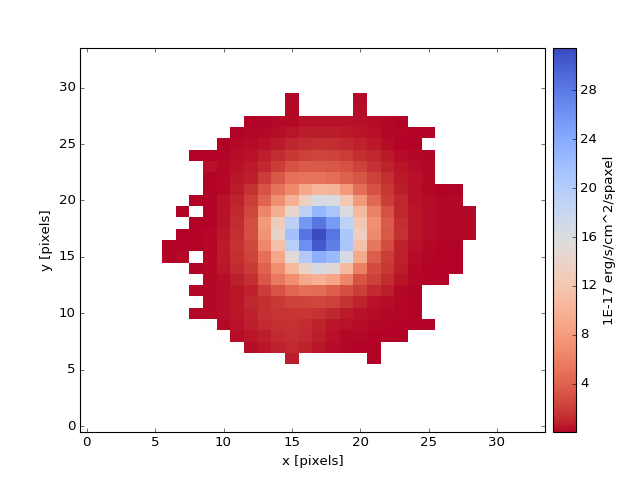

In [51]:
import numpy as np
# select the locations where the mask is non-zero
badvals = np.where(haflux.mask > 0)
# set those values to a numpy nan. 
haflux.value[badvals] = np.nan
# check the min and max
print('min', np.nanmin(haflux.value), 'max', np.nanmax(haflux.value))
haflux.plot()

From the maps object, we can also easily plot the ratio between two maps, e.g. emission-line ratios, using the **getMapRatio** method.  Map ratios are Map objects the same as any other, so you can access their array values or plot them

<Marvin Map (plateifu='8485-1901', property='emline_gflux', channel='nii_6585/ha_6564')>


<IPython.core.display.Javascript object>


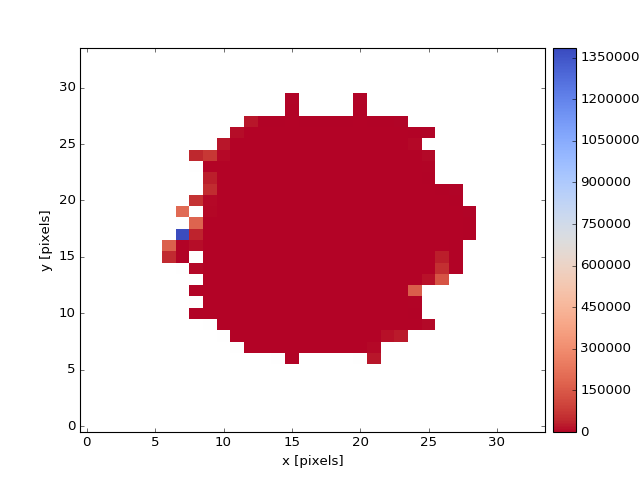

In [53]:
# Let's look at the NII-to-Halpha emission-line ratio map
niiha = maps.getMapRatio('emline_gflux', 'nii_6585', 'ha_6564')
print(niiha)
niiha.plot()

**Try Yourself** Modify the above to display the map for the emission-line ratio OIII/Hbeta

# From a Marvin Cube

In [12]:
# import the Cube tool
from marvin.tools.cube import Cube

# point to your file
filename ='/Users/Brian/Work/Manga/redux/v2_0_1/8485/stack/manga-8485-1901-LOGCUBE.fits.gz'

# get a cube
cube = Cube(filename=filename)
print(cube)

<Marvin Cube (plateifu='8485-1901', mode='local', data_origin='file')>


Once we have a cube, we can get its maps using the **getMaps** method.  getMaps is just a wrapper to the Marvin Maps Tool.  Once we have the maps, we can do all the same things as before.

In [13]:
maps = cube.getMaps()
print(maps)

<Marvin Maps (plateifu='8485-1901', mode='local', data_origin='db')>
